In [1]:
import pandas as pd
import numpy as np


#df = pd.read_csv("gnb_normalize_dataset_fix.csv")
df = pd.read_csv("dataset_iklim_new.csv", delimiter=";", thousands=".", decimal=",", parse_dates=["Tanggal"], index_col="Tanggal")

df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C


- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- Tn: Temperatur minimum (°C)
- Tx: Temperatur maksimum (°C)
- **Tavg: Temperatur rata-rata (°C)**
- **RH_avg: Kelembapan rata-rata (%)**
- **RR: Curah hujan (mm)**
- **ss: Lamanya penyinaran matahari (jam)**
- ff_x: Kecepatan angin maksimum (m/s)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)

Dropping unused data - null data

In [2]:
df = df.dropna()
df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C


then, drop the rows with value 8888 (data tidak terukur a.k.a not measured) and 9999 (Tidak Ada Data (tidak dilakukan pengukuran) a.k.a no data), because we don't need it. 

Based on observation above, the value with 8888 and 9999 is only in the columns with column called rr (curah hujan)

In [3]:
# delete row with 8888 value
df.drop(df[df['RR'] == 8888].index, inplace=True)
df.drop(df[df['RR'] == 9999].index, inplace=True)
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_16576\816279575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 8888].index, inplace=True)
C:\Users\akuradz\AppData\Local\Temp\ipykernel_16576\816279575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['RR'] == 9999].index, inplace=True)


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
Tanggal,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C


Limit of Extreme Climate on Stasiun Klimatologi Jawa Timur

- rr/curah hujan = 145mm (28/02/2021)
- Tx/temperatur maksimum = 32°C (12/04/2020)
- Tn/temperatur minimum = 14.2°C (30/07/2020)
- Tavg/temperatur rata-rata = 26.9°C (12/11/2020)
- rh/kelembapan rata-rata = 38% (26/07/2021)
- wx/kecepatan angin maksimum = 2 knot (05/04/2020)    

In [4]:
# limit of extreme value
labels_of_y = [0, 1]

rr_treshold = 145
tx_treshold = 32
tn_treshold = 14.2
tAvg_treshold = 26.9
rh_treshold = 38
wx_treshold = 2

df_dummy = df.copy()

df_discreted = pd.DataFrame()
df_discreted['rr'] = np.where(df_dummy['RR'] >= rr_treshold, 1, 0)
df_discreted['tx'] = np.where(df_dummy['Tx'] >= tx_treshold, 1, 0)
df_discreted['tn'] = np.where(df_dummy['Tn'] >= tn_treshold, 1, 0)
df_discreted['tAvg'] = np.where(df_dummy['Tavg'] >= tAvg_treshold, 1, 0)
df_discreted['rh'] = np.where(df_dummy['RH_avg'] >= rh_treshold, 1, 0)
df_discreted['wx'] = np.where(df_dummy['ff_avg'] >= wx_treshold, 1, 0)
df_discreted['probability'] = 0
df_discreted['extreme'] = 'UNKNOWN'

df_discreted

,rr,tx,tn,tAvg,rh,wx,probability,extreme
0,0,0,1,0,1,0,0,UNKNOWN
1,0,0,1,0,1,0,0,UNKNOWN
2,0,0,1,0,1,0,0,UNKNOWN
3,0,0,1,0,1,0,0,UNKNOWN
4,0,0,1,0,1,1,0,UNKNOWN
...,...,...,...,...,...,...,...,...
910,0,0,1,0,1,1,0,UNKNOWN
911,0,0,1,0,1,1,0,UNKNOWN
912,0,0,1,0,1,0,0,UNKNOWN
913,0,0,1,0,1,1,0,UNKNOWN


In [5]:

# iterate each row in dataframe
for index, row in df_discreted.iterrows():
    # count value with TINGGI value
    tinggi = 0

    # loop each column in dataframe
    for col in range(6):
        # check if value is TINGGI
        if row[col] == 1:
            tinggi += 1
  
    # calculate probability
    prob = tinggi / 6
    # set row column presentase with probability value
    
    df_discreted.loc[index, 'probability'] = prob

    df_discreted.loc[index, 'extreme'] = 1 if prob >= 0.5 else 0

df_discreted

,rr,tx,tn,tAvg,rh,wx,probability,extreme
0,0,0,1,0,1,0,0.333333,0
1,0,0,1,0,1,0,0.333333,0
2,0,0,1,0,1,0,0.333333,0
3,0,0,1,0,1,0,0.333333,0
4,0,0,1,0,1,1,0.500000,1
...,...,...,...,...,...,...,...,...
910,0,0,1,0,1,1,0.500000,1
911,0,0,1,0,1,1,0.500000,1
912,0,0,1,0,1,0,0.333333,0
913,0,0,1,0,1,1,0.500000,1


In [6]:
# copy df_discreted['extreme'] to df on right side as new column as number
df['extreme'] = df_discreted['extreme'].values
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_16576\1973297866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extreme'] = df_discreted['extreme'].values


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,extreme
Tanggal,,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,C,0
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,C,0
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,C,0
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,C,0
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,SE,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,S,1
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,C,1
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,C,0


In [7]:
# labelling using sklearn on column ff_avg
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ddd_car'] = le.fit_transform(df['ddd_car'])
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_16576\1622747156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ddd_car'] = le.fit_transform(df['ddd_car'])


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,extreme
Tanggal,,,,,,,,,,,
2020-01-01,20.4,28.2,23.7,87.0,43.3,4.4,3.0,170.0,1.0,0,0
2020-01-02,21.2,28.8,23.8,90.0,2.6,3.9,4.0,150.0,1.0,0,0
2020-01-03,21.4,28.8,24.0,86.0,1.9,4.6,4.0,160.0,1.0,0,0
2020-01-04,21.6,28.6,24.2,86.0,2.1,3.0,4.0,290.0,1.0,0,0
2020-01-05,22.0,28.3,24.1,88.0,1.0,1.3,3.0,140.0,2.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19.8,29.0,23.7,78.0,0.0,9.0,3.0,170.0,2.0,5,1
2022-09-05,19.4,29.3,23.8,78.0,16.4,5.7,5.0,90.0,2.0,0,1
2022-09-06,19.0,29.4,23.6,81.0,0.0,2.6,4.0,140.0,1.0,0,0


## Split to X and y

In [38]:
X = df.drop(['extreme'], axis=1)
y = df['extreme'].astype(int)

## Scaled it first

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.13605221, -0.67151577, -0.48257747, ...,  0.68021321,
        -1.08165573, -0.83063321],
       [ 0.754625  , -0.15161426, -0.37571436, ...,  0.36563394,
        -1.08165573, -0.83063321],
       [ 0.9092682 , -0.15161426, -0.16198813, ...,  0.52292357,
        -1.08165573, -0.83063321],
       ...,
       [-0.94645017,  0.36828724, -0.58944059, ...,  0.2083443 ,
        -1.08165573, -0.83063321],
       [-0.94645017, -0.15161426, -0.05512502, ...,  1.15208211,
         0.2594215 ,  1.16210247],
       [-0.71448538,  0.88818875, -0.6963037 , ..., -0.2635246 ,
         0.2594215 , -0.83063321]])

In [40]:
# Kaiser Meyer Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(X_scaled)
kmo_model

0.5721285904985999

## Test without PCA

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [43]:
X.shape

(915, 10)

## Test with PCA

In [44]:
from sklearn.decomposition import PCA

pca = PCA(0.95) # will retain or keep 95% of the variance

X_pca = pca.fit_transform(X)
X_pca.shape

(915, 2)

In [45]:
pca.explained_variance_ratio_ # will show the variance retained by each component

array([0.93837772, 0.04846228])

In [46]:
pca.n_components_ # will show the number of components

2

In [47]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [48]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train_pca)
model.score(X_test_pca, y_test_pca)

0.6502732240437158

In [49]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(915, 2)

<AxesSubplot:>

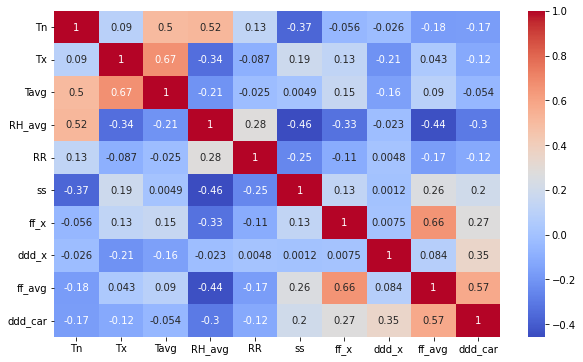

In [51]:
# check what features are important
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
